# Random Forest

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)

# Importing and Merging

In [2]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)

### Creating a model

In [3]:
df.head(2)

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0
2,152,Negligence,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0


In [4]:
df['STAT_CAUSE_DESCR'].value_counts()

Lightning         19825
Negligence        13595
Infrastructure     9829
Arson              8957
Name: STAT_CAUSE_DESCR, dtype: int64

In [5]:
X = df.drop(["STAT_CAUSE_DESCR", 'STATE'] , axis='columns')
X = pd.get_dummies(columns=[ 
                            'SOURCE_SYSTEM_TYPE',
                            'FIRE_SIZE_CLASS',
                            'SOURCE_REPORTING_UNIT_NAME'
                           ], 
                   drop_first=True, data=X)

y = df['STAT_CAUSE_DESCR']

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

In [7]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [8]:
null_model = y.value_counts(normalize= True)
null_model

Lightning         0.379746
Negligence        0.260411
Infrastructure    0.188273
Arson             0.171570
Name: STAT_CAUSE_DESCR, dtype: float64

In [9]:
y.describe()

count         52206
unique            4
top       Lightning
freq          19825
Name: STAT_CAUSE_DESCR, dtype: object

### Random Forest

In [10]:
model_rf = RandomForestClassifier()
model_rf.fit(Z_train, y_train)
model_rf.score(Z_test, y_test)

0.7008235970120666

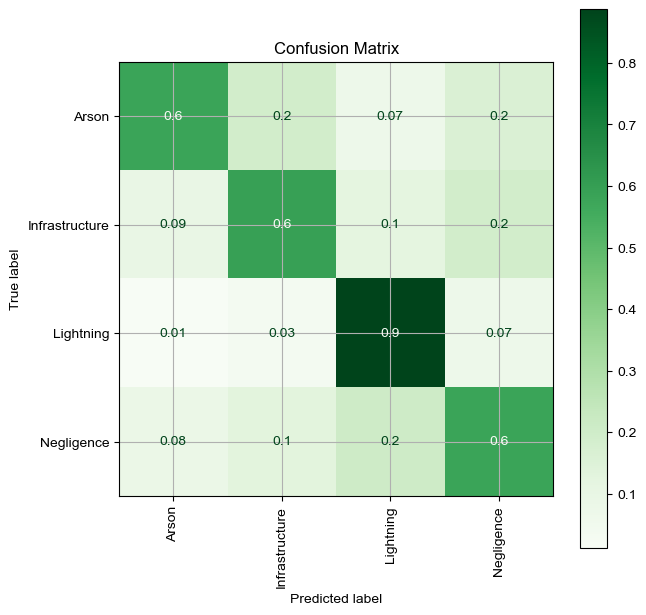

In [11]:
f,ax = plt.subplots(1,1,figsize=(7,7))

cm= ConfusionMatrixDisplay.from_estimator(model_rf,Z_test,y_test, cmap = 'Greens',normalize= 'true', xticks_rotation='vertical', values_format='.1g', ax=ax)
plt.title("Confusion Matrix")
sns.set(font_scale=.9)
plt.grid(None)

;
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.rcParams["figure.facecolor"] = "#FAEEDA"

# Bin combining
dropping misc
combining children with negligence
infrastructure and equipment use to 

In [12]:
df=df[df["STAT_CAUSE_DESCR"]!='Miscellaneous']

In [13]:
df['STAT_CAUSE_DESCR'] = np.where(df['STAT_CAUSE_DESCR'] == 'Children', 'Negligence',df['STAT_CAUSE_DESCR'])

In [14]:
df['STAT_CAUSE_DESCR'] = np.where(df['STAT_CAUSE_DESCR'] == 'Equipment Use','Infrastructure', df['STAT_CAUSE_DESCR'])


In [15]:
# df['STAT_CAUSE_DESCR'] = np.where(df['STAT_CAUSE_DESCR'] == 'Equipment Use','Infrastructure')

In [16]:
X = df.drop(["STAT_CAUSE_DESCR", 'STATE'] , axis='columns')
X = pd.get_dummies(columns=[ 
                            'SOURCE_SYSTEM_TYPE',
                            'FIRE_SIZE_CLASS',
                            'SOURCE_REPORTING_UNIT_NAME'
                           ], 
                   drop_first=True, data=X)

y = df['STAT_CAUSE_DESCR']

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023, stratify=y)

In [18]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [19]:
null_model = y.value_counts(normalize= True)
null_model

Lightning         0.379746
Negligence        0.260411
Infrastructure    0.188273
Arson             0.171570
Name: STAT_CAUSE_DESCR, dtype: float64

In [20]:
model_drop = RandomForestClassifier()
model_drop.fit(Z_train, y_train)
model_drop.score(Z_test, y_test)

0.6991955564068186

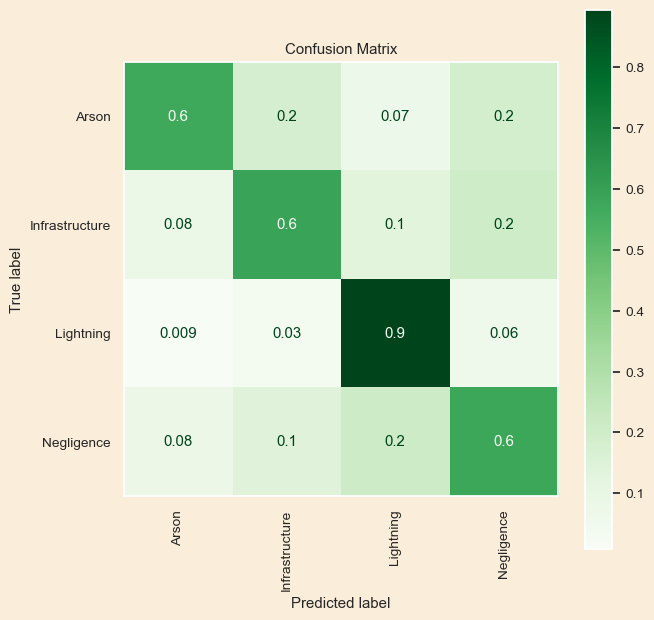

In [21]:
f,ax = plt.subplots(1,1,figsize=(7,7))

cm= ConfusionMatrixDisplay.from_estimator(model_drop,Z_test,y_test, cmap = 'Greens',normalize= 'true', xticks_rotation='vertical', values_format='.1g', ax=ax)
plt.title("Confusion Matrix")
sns.set(font_scale=.9)
plt.grid(None)

;
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.rcParams["figure.facecolor"] = "#FAEEDA"

In [22]:
df['STAT_CAUSE_DESCR'].value_counts()

Lightning         19825
Negligence        13595
Infrastructure     9829
Arson              8957
Name: STAT_CAUSE_DESCR, dtype: int64

# Grid Search

In [23]:
rf_params = {
    'n_estimators':[50, 100, 150],
    'max_depth': [None, 4,8]
}

In [24]:
gs= GridSearchCV(model_rf, param_grid=rf_params, cv=5, n_jobs=-2)

In [25]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'max_depth': [None, 4, 8],
                         'n_estimators': [50, 100, 150]})

In [26]:
gs.best_score_

0.6933005033408512

In [27]:
gs.best_params_

{'max_depth': None, 'n_estimators': 150}

In [28]:
# gs.get_params()

In [29]:
rf_params2 = {
    'n_estimators':[200,500],
    'max_depth': [None],
    'min_samples_leaf':[1,2]
}

In [30]:
gs2= GridSearchCV(model_rf, param_grid=rf_params2, cv=5, n_jobs=-2)

In [31]:
gs2.fit(X_train, y_train)

/Users/ryan/miniconda3/envs/tf/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2],
                         'n_estimators': [200, 500]})

In [32]:
gs2.best_score_

0.6941624834356436

# What if we only focus on the highest correlation categories?

In [33]:
y.value_counts(normalize= True)

Lightning         0.379746
Negligence        0.260411
Infrastructure    0.188273
Arson             0.171570
Name: STAT_CAUSE_DESCR, dtype: float64

/var/folders/fm/_6kg8xkn3jz4slz27zwpqnhc0000gn/T/ipykernel_7947/1173274598.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()[['class_number']].sort_values('class_number', ascending=False)


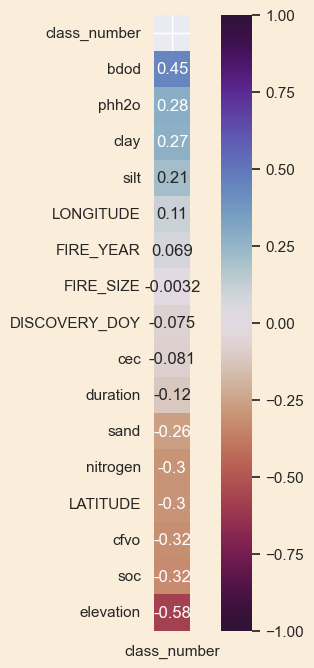

In [34]:
cause_map={'Lightning':0, 'Miscellaneous':1, 'Negligence':3,
         'Equipment Use':4, 'Arson':5, 'Children':6, 'Infrastructure':7}
df['class_number'] = df['STAT_CAUSE_DESCR'].map(cause_map)
plt.figure(figsize = (8,8))

corr = df.corr()[['class_number']].sort_values('class_number', ascending=False)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'twilight_shifted_r', annot = True, vmin = -1, vmax = 1);

In [35]:
#lets try dropping categories between -.1 and .1 correlation values
df.columns

Index(['DISCOVERY_DOY', 'STAT_CAUSE_DESCR', 'STATE', 'SOURCE_SYSTEM_TYPE',
       'duration', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'SOURCE_REPORTING_UNIT_NAME', 'FIRE_YEAR', 'FIRE_SIZE', 'elevation',
       'bdod', 'cec', 'cfvo', 'clay', 'nitrogen', 'phh2o', 'sand', 'silt',
       'soc', 'class_number'],
      dtype='object')

In [36]:
X = df[[ 'elevation', 'bdod', 'clay', 'silt', 'nitrogen', 'sand', 'FIRE_SIZE_CLASS', 'duration', 'DISCOVERY_DOY']]

X = pd.get_dummies(columns=['FIRE_SIZE_CLASS'], drop_first=True, data=X)

y = df['STAT_CAUSE_DESCR']

In [37]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

In [38]:
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)

Z_test = sc.transform(X_test)


In [39]:
model_rf = RandomForestClassifier()
model_rf.fit(Z_train, y_train)
model_rf.score(Z_test, y_test)

0.6455659835280597